# Analytical Benchmarks - 3D Cartesian Linear

In [1]:
#import and initialisation
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()
%matplotlib inline

In [2]:
#define the symbols used in the derivation
x,y,z,rho,C1,Cx,Cy,Cz,gx,mu,gy,gz= symbols( 'x y z rho C1 C_x C_y C_z g_x mu g_y g_z')
exx,eyy,exx = symbols("e_{xx} e_{yy} e_{zz}")
exy,exz,eyx = symbols("e_{xy} e_{xz} e_{yz}")
rhox, rhoy,rhoz = symbols("rho_x rho_y rho_z")
tau_xx, tau_yy, tau_zz = symbols("tau_{xx} tau_{xy} tau_{yy}")
tau_xy, tau_xz, tau_yz = symbols("tau_{xy} tau_{xz} tau_{yz}")
tau_yx, tau_zx, tau_zy = symbols("tau_{yx} tau_{zx} tau_{zy}")
vx,vy,vz = symbols('v_x v_y v_z',function=True)
p = symbols('p',function=True)

Firstly, we define the continuity (mass conservation) equation and the momentum equation in 1D, as well as the 1D stress tensor ($\tau$):
TODO:clean these up such that momentum equations directly call tau functions, everything takes proper arguments, using global values for anything except mu seems dangerous

In [3]:
def get_continuity_equation_x(vx,rhox):
    return (1/vx)*Derivative(vx,x) + (1/rhox)*diff(rhox,x)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [4]:
def get_continuity_equation_y(vy,rhoy):
    return (1/vy)*Derivative(vy,y) + (1/rhoy)*diff(rhoy,y)

In [5]:
def get_continuity_equation_z(vz,rhoz):
    return (1/vz)*Derivative(vz,z) + (1/rhoz)*diff(rhoz,z)

In [6]:
def get_velocity_divergence(vx,vy,vz):
    return Derivative(vx,x) + Derivative(vy,y) + Derivative(vz,z)

In [7]:
def get_tau_xx():
    div = get_velocity_divergence(vx,vy,vz)
    return 2*mu*Derivative(vx,x) - mu*div*Rational(2,3)

In [8]:
def get_tau_yy():
    div = get_velocity_divergence(vx,vy,vz)
    return 2*mu*Derivative(vy,y) - mu*div*Rational(2,3)

In [9]:
def get_tau_zz():
    div = get_velocity_divergence(vx,vy,vz)
    return 2*mu*Derivative(vz,z) - mu*div*Rational(2,3)

In [10]:
def get_tau_xy():
    return mu*(Derivative(vx,y) + Derivative(vy,x))

In [11]:
def get_tau_xz():
    return mu*(Derivative(vx,z) + Derivative(vz,x))

In [12]:
def get_tau_yz():
    return mu*(Derivative(vy,z) + Derivative(vz,y))

In [13]:
def get_momentum_equation_x(p):
    return -Derivative(p,x)+rho*gx+(Derivative(tau_xx,x)+Derivative(tau_xy,y)+Derivative(tau_xz,z)).doit()

In [14]:
def get_momentum_equation_y(p):
    return -Derivative(p,y)+rho*gy+(Derivative(tau_yx,x)+Derivative(tau_yy,y)+Derivative(tau_yz,z)).doit()

In [15]:
def get_momentum_equation_z(p):
    return -Derivative(p,z)+rho*gz+(Derivative(tau_zx,x)+Derivative(tau_zy,y)+Derivative(tau_zz,z)).doit()

Next we prescibe the density profile, and then get the continuity equation, in both x and y directions:

In [16]:
rhox=x
rhoy=y
rhoz=z
rho=rhox*rhoy*rhoz

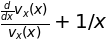

In [17]:
continuity_equation_x = get_continuity_equation_x(vx(x),rhox)
continuity_equation_x

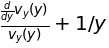

In [18]:
continuity_equation_y = get_continuity_equation_y(vy(y),rhoy)
continuity_equation_y

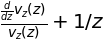

In [19]:
continuity_equation_z = get_continuity_equation_z(vz(z),rhoz)
continuity_equation_z

(Note that equations in Sympy are implicitly equal to zero)

Then, we solve the continuity equations for the velocity:

In [20]:
velocity_equation_x = dsolve(continuity_equation_x)
velocity_equation_x

In [21]:
velocity_equation_y = dsolve(continuity_equation_y)
velocity_equation_y

In [22]:
velocity_equation_z = dsolve(continuity_equation_z)
velocity_equation_z

Now assign this equation to a new value for $v_x$, and replace the placeholder constant $C1$ with the more informative $C_x$:

In [23]:
vx = velocity_equation_x.rhs
vx = vx.subs(C1,Cx)
vx

In [24]:
vy = velocity_equation_y.rhs
vy = vy.subs(C1,Cy)
vy

In [25]:
vz = velocity_equation_z.rhs
vz = vz.subs(C1,Cz)
vz

Next, we obtain the stress tensor $\tau$:

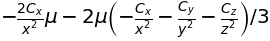

In [26]:
tau_xx = get_tau_xx()
tau_xx.doit()

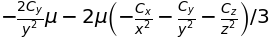

In [27]:
tau_yy = get_tau_yy()
tau_yy.doit()

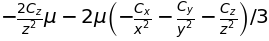

In [28]:
tau_zz = get_tau_zz()
tau_zz.doit()

In [29]:
tau_xy = get_tau_xy()
tau_yx = get_tau_xy()
tau_xy.doit()

In [30]:
tau_xz = get_tau_xz()
tau_zx = get_tau_xz()
tau_xz.doit()

In [31]:
tau_yz = get_tau_yz()
tau_zy = get_tau_yz()
tau_yz.doit()

Now, we prescibe the gravitational field:

In [32]:
gx = 1/(y*z)
gy = 1/(x*z)
gz = 1/(y*x)

Then, we obtain the momentum equation:

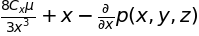

In [33]:
momentum_equation_x = get_momentum_equation_x(p(x,y,z))
momentum_equation_x

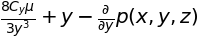

In [34]:
momentum_equation_y = get_momentum_equation_y(p(x,y,z))
momentum_equation_y

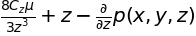

In [35]:
momentum_equation_z = get_momentum_equation_z(p(x,y,z))
momentum_equation_z

Unfortunately, Sympy cannot solve 3D (or higher dimensional) differential equations. However, from the solutions to the equivalent linear benchmarks in 1D and 2D, we can infer the form of the pressure solution:

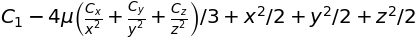

In [36]:
p = C1 - Rational(4,3)*mu*(Cx/x**2+Cy/y**2+Cz/z**2) + (x**2+y**2+z**2)/2
p

We then verify the correctness of this infered solution by substitution into the momentum equations, and calculating the residual (which ought to be zero):

In [37]:
get_momentum_equation_x(p).doit()

In [38]:
get_momentum_equation_y(p).doit()

In [39]:
get_momentum_equation_z(p).doit()

Finally, we need to calculate the strain rate:

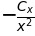

In [40]:
exx = Derivative(vx,x).doit()
exx

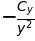

In [41]:
eyy = Derivative(vy,y).doit()
eyy

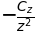

In [42]:
ezz = Derivative(vz,z).doit()
ezz

In [43]:
exy = Derivative(vx,y).doit()
exy

In [44]:
exz = Derivative(vx,z).doit()
exz

In [45]:
eyz = Derivative(vy,z).doit()
eyz

This gives us the following final equations for the velocity and pressure:

In [46]:
velocity_equation_x

In [47]:
velocity_equation_y

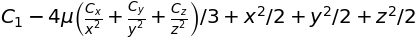

In [48]:
p

# Plotting

Firstly, we need to generate functions from the above expressions for density, velocity and pressure:

In order to plot a 3D function on a 2D page (or screen), we choose a plane in the function - in this case, z=1

In [49]:
density_function = lambdify((x,y),rho.subs(z,1))

In [50]:
vx_function = lambdify((x,y),vx.subs(Cx,1))

In [51]:
vy_function = lambdify((x,y),vy.subs(Cy,1))

In [52]:
vz_function = lambdify(z,vz.subs(Cz,1))

In [53]:
def v_magnitude_function(x,y):
    return np.sqrt(vy_function(x,y)**2 + vx_function(x,y)**2 + vz_function(1))

In [54]:
pressure_function = lambdify((x,y),p.subs(C1,0).subs(Cx,1).subs(gx,1).subs(mu,1).subs(Cy,1).subs(z,1))

In [55]:
exx_function = lambdify((x,y),exx.subs(Cx,1))

In [56]:
eyy_function = lambdify((x,y),eyy.subs(Cy,1))

Now we need an x range to plot over:


In [57]:
x_plotting = np.arange(1,2,0.01)
y_plotting = np.arange(1,2,0.01)
X_plotting,Y_plotting = np.meshgrid(x_plotting,y_plotting)

Finally, we plot the density, velocity and pressure profiles:

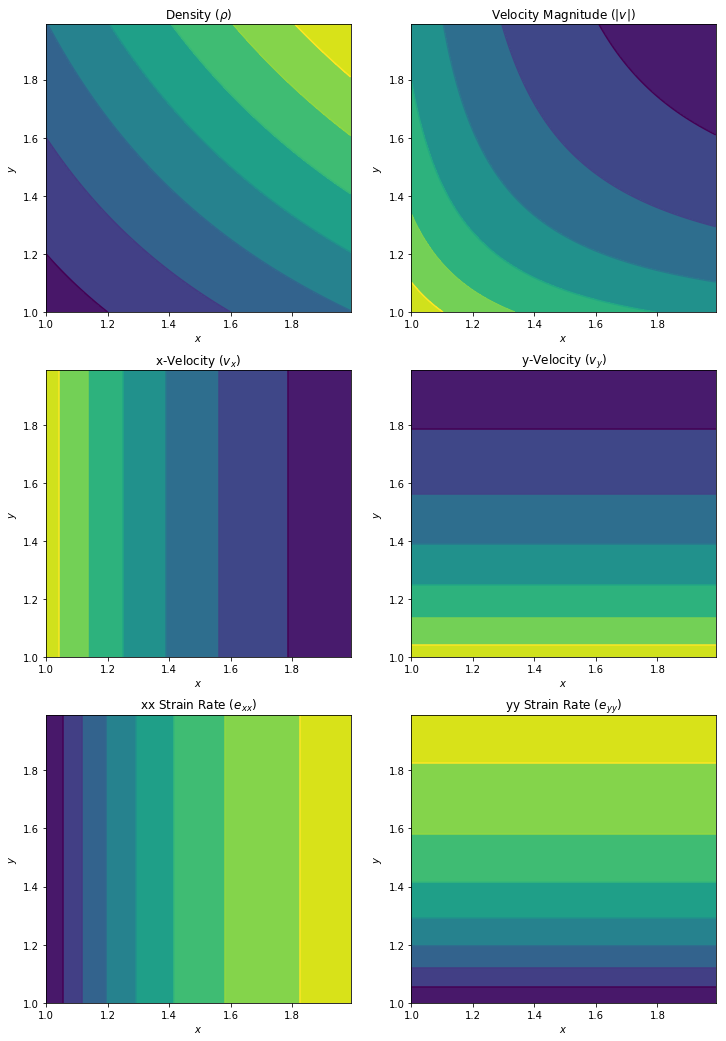

In [58]:
fig,axes = plt.subplots(3,2,figsize=(12,18))

axes[0,0].contourf(X_plotting,Y_plotting,density_function(X_plotting,Y_plotting))
axes[0,0].contour(X_plotting,Y_plotting,density_function(X_plotting,Y_plotting))
axes[0,0].set_xlabel("$x$")
axes[0,0].set_ylabel("$y$")
axes[0,0].set_title(r"Density ($\rho$)")

axes[0,1].contourf(X_plotting,Y_plotting,v_magnitude_function(X_plotting,Y_plotting))
axes[0,1].contour(X_plotting,Y_plotting,v_magnitude_function(X_plotting,Y_plotting))
axes[0,1].set_xlabel("$x$")
axes[0,1].set_ylabel("$y$")
axes[0,1].set_title(r"Velocity Magnitude ($|v|$)")

axes[1,0].contourf(X_plotting,Y_plotting,vx_function(X_plotting,Y_plotting))
axes[1,0].contour(X_plotting,Y_plotting,vx_function(X_plotting,Y_plotting))
axes[1,0].set_xlabel("$x$")
axes[1,0].set_ylabel("$y$")
axes[1,0].set_title(r"x-Velocity ($v_x$)")

axes[1,1].contourf(X_plotting,Y_plotting,vy_function(X_plotting,Y_plotting))
axes[1,1].contour(X_plotting,Y_plotting,vy_function(X_plotting,Y_plotting))
axes[1,1].set_xlabel("$x$")
axes[1,1].set_ylabel("$y$")
axes[1,1].set_title(r"y-Velocity ($v_y$)")

axes[2,0].contourf(X_plotting,Y_plotting,exx_function(X_plotting,Y_plotting))
axes[2,0].contour(X_plotting,Y_plotting,exx_function(X_plotting,Y_plotting))
axes[2,0].set_xlabel("$x$")
axes[2,0].set_ylabel("$y$")
axes[2,0].set_title(r"xx Strain Rate ($e_{xx}$)")

axes[2,1].contourf(X_plotting,Y_plotting,eyy_function(X_plotting,Y_plotting))
axes[2,1].contour(X_plotting,Y_plotting,eyy_function(X_plotting,Y_plotting))
axes[2,1].set_xlabel("$x$")
axes[2,1].set_ylabel("$y$")
axes[2,1].set_title(r"yy Strain Rate ($e_{yy}$)")

In [59]:
fig.savefig("3DCartesianLinear.pdf")